In [1]:
#!/usr/bin/env python
"""
Tutorial to demonstrate running parameter estimation on a binary neutron star
system taking into account tidal deformabilities.

This example estimates the masses using a uniform prior in both component masses
and also estimates the tidal deformabilities using a uniform prior in both
tidal deformabilities
"""


import numpy as np

import bilby

# Specify the output directory and the name of the simulation.
outdir = 'outdir'
label = 'bns_example'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(88170235)


In [2]:
# We are going to inject a binary neutron star waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two black holes (mass_1, mass_2),
# aligned spins of both black holes (chi_1, chi_2), etc.
injection_parameters = dict(
    mass_1=1.5, mass_2=1.3, chi_1=0.02, chi_2=0.02, luminosity_distance=50.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413,
    ra=1.375, dec=-1.2108, lambda_1=400, lambda_2=450)


In [3]:
# Set the duration and sampling frequency of the data segment that we're going
# to inject the signal into. For the
# TaylorF2 waveform, we cut the signal close to the isco frequency
duration = 32
sampling_frequency = 2 * 1024
start_time = injection_parameters['geocent_time'] + 2 - duration


In [4]:
# Fixed arguments passed into the source model. The analysis starts at 40 Hz.
waveform_arguments = dict(waveform_approximant='IMRPhenomPv2_NRTidal',
                          reference_frequency=50., minimum_frequency=40.0)


In [5]:
# Create the waveform_generator using a LAL Binary Neutron Star source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=waveform_arguments)


10:24 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters


In [6]:
# Set up interferometers.  In this case we'll use three interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1), and Virgo (V1)).
# These default to their design sensitivity and start at 40 Hz.
interferometers = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
for interferometer in interferometers:
    interferometer.minimum_frequency = 40
interferometers.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=start_time)
interferometers.inject_signal(parameters=injection_parameters,
                              waveform_generator=waveform_generator)


10:24 bilby INFO    : Injected signal in H1:
10:24 bilby INFO    :   optimal SNR = 34.44
10:24 bilby INFO    :   matched filter SNR = 35.22-0.58j
10:24 bilby INFO    :   mass_1 = 1.5
10:24 bilby INFO    :   mass_2 = 1.3
10:24 bilby INFO    :   chi_1 = 0.02
10:24 bilby INFO    :   chi_2 = 0.02
10:24 bilby INFO    :   luminosity_distance = 50.0
10:24 bilby INFO    :   theta_jn = 0.4
10:24 bilby INFO    :   psi = 2.659
10:24 bilby INFO    :   phase = 1.3
10:24 bilby INFO    :   geocent_time = 1126259642.413
10:24 bilby INFO    :   ra = 1.375
10:24 bilby INFO    :   dec = -1.2108
10:24 bilby INFO    :   lambda_1 = 400
10:24 bilby INFO    :   lambda_2 = 450
10:24 bilby INFO    : Injected signal in L1:
10:24 bilby INFO    :   optimal SNR = 27.88
10:24 bilby INFO    :   matched filter SNR = 28.28+0.76j
10:24 bilby INFO    :   mass_1 = 1.5
10:24 bilby INFO    :   mass_2 = 1.3
10:24 bilby INFO    :   chi_1 = 0.02
10:24 bilby INFO    :   chi_2 = 0.02
10:24 bilby INFO    :   luminosity_distance =

[{'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -4.02066493e-25+1.53786385e-25j, -4.02109206e-25+1.53625167e-25j,
          0.00000000e+00-0.00000000e+00j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.53267924e-25+4.00711004e-25j, 1.53107249e-25+4.00753572e-25j,
         0.00000000e+00+0.00000000e+00j])},
 {'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -4.02066493e-25+1.53786385e-25j, -4.02109206e-25+1.53625167e-25j,
          0.00000000e+00-0.00000000e+00j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.53267924e-25+4.00711004e-25j, 1.53107249e-25+4.00753572e-25j,
         0.00000000e+00+0.00000000e+00j])},
 {'plus': ar

In [7]:
# Load the default prior for binary neutron stars.
# We're going to sample in chirp_mass, symmetric_mass_ratio, lambda_tilde, and
# delta_lambda rather than mass_1, mass_2, lambda_1, and lambda_2.
# BNS have aligned spins by default, if you want to allow precessing spins
# pass aligned_spin=False to the BNSPriorDict
priors = bilby.gw.prior.BNSPriorDict()
for key in ['psi', 'geocent_time', 'ra', 'dec', 'chi_1', 'chi_2',
            'theta_jn', 'luminosity_distance', 'phase']:
    priors[key] = injection_parameters[key]
priors.pop('mass_ratio')
priors.pop('lambda_1')
priors.pop('lambda_2')
priors['chirp_mass'] = bilby.core.prior.Gaussian(
    1.215, 0.1, name='chirp_mass', unit='$M_{\\odot}$')
priors['symmetric_mass_ratio'] = bilby.core.prior.Uniform(
    0.1, 0.25, name='symmetric_mass_ratio')
priors['lambda_tilde'] = bilby.core.prior.Uniform(0, 5000, name='lambda_tilde')
priors['delta_lambda'] = bilby.core.prior.Uniform(
    -5000, 5000, name='delta_lambda')

10:25 bilby INFO    : No prior given, using default BNS priors in /Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/bilby/gw/prior_files/aligned_spins_bns_tides_on.prior.


In [9]:
# Initialise the likelihood by passing in the interferometer data (IFOs)
# and the waveform generator
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=interferometers, waveform_generator=waveform_generator,
    time_marginalization=False, phase_marginalization=False,
    distance_marginalization=False, priors=priors)


11:44 bilby INFO    : Running for label 'bns_example', output will be saved to 'outdir'
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11:44 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
11

0it [00:00, ?it/s]

11:44 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'print_progress': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 100, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 60, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f9731587610>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
11:44 bilby INFO    : Checkpoint every check_point_delta_t = 600s
11:44 bilby INFO    : Using dynesty version 1.0.1
11:44 bilby INFO    : Using the bilby-implemented rwa

/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
12:16 bilby

13:26 bilby WARNING : Failed to create dynesty run plot at checkpoint
13:37 bilby INFO    : Written checkpoint file outdir/bns_example_resume.pickle
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behav

/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
14:50 bilby

16:57 bilby WARNING : Failed to create dynesty run plot at checkpoint
17:16 bilby INFO    : Written checkpoint file outdir/bns_example_resume.pickle
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behav

/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
18:42 bilby

19:59 bilby WARNING : Failed to create dynesty run plot at checkpoint
20:29 bilby INFO    : Written checkpoint file outdir/bns_example_resume.pickle
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.zeros(nsamples, dtype=np.int)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/dynesty/utils.py:171: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behav

21:38 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/2531 [00:00<?, ?it/s]

21:38 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/2531 [00:00<?, ?it/s]

21:38 bilby INFO    : Summary of results:
nsamples: 2531
ln_noise_evidence: -95838.299
ln_evidence: -94387.627 +/-  0.640
ln_bayes_factor: 1450.672 +/-  0.640

/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/rafiaomer/opt/anaconda3/lib/python3.9/site-packages/xarray/core/npcompat.py:82: DeprecationWarning: distutils Version classes are deprecated.

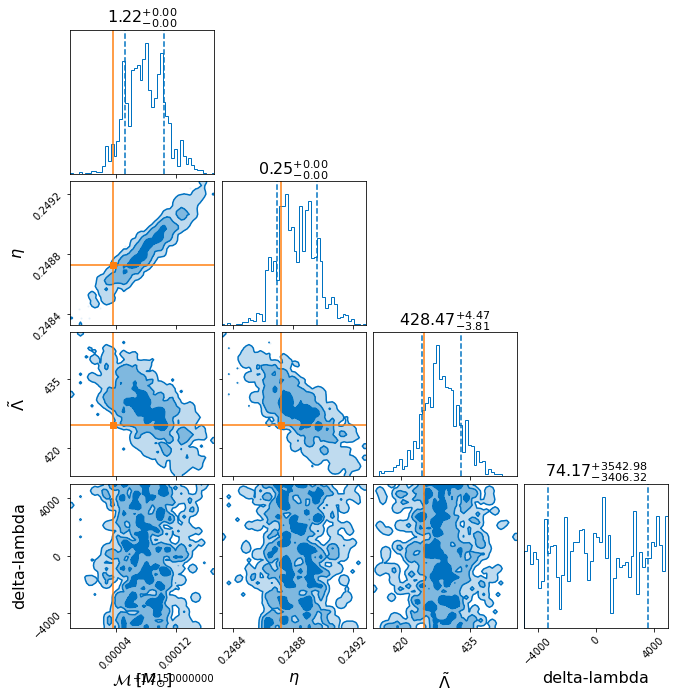

In [12]:
# Run sampler.  In this case we're going to use the `nestle` sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=100,
    injection_parameters=injection_parameters, outdir=outdir, label=label,
    conversion_function=bilby.gw.conversion.generate_all_bns_parameters)

result.plot_corner()